In [84]:
%load_ext autoreload
%autoreload 2

import import_ipynb
import clean_data
import pandas as pd
import Modeling as model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dfs = clean_data.getDataFramesFromFiles('CollegeScorecard_Raw_Data/')
clean_data.addYearAsLabel(dfs)
clean_data.dropUselessColumn(dfs)
clean_data.convertUnknownsToNans(dfs)
clean_data.dropColsAllNans(dfs)
merged_df = clean_data.intersection_and_merge(dfs)
merged_df = clean_data.convertMixedDataTypes(merged_df)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (1806,1814) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (1,6,442,451,598,607,611,620,624,633,789,802,806,815,971,984,997,1153,1166,1407,1408,1411,1424,1425,1426,1431,1432,1433,1437,1438,1439,1440,1445,1446,1447,1451,1452,1453,1454,1459,1460,1461,1465,1466,1467,1468,1473,1474,1475,1479,1480,1481,1482,1487,1488,1489,1501,1502,1537,1538,1539,1540,1541,1542,1606,1609,1610,1611,1613,1614,1615,1616,1688,1689,1690,1691,1692,1908,1909,1910,1911,1912,1913) have mixed types. Specify d

In [4]:
merged_df = merged_df.fillna(merged_df.mean())

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


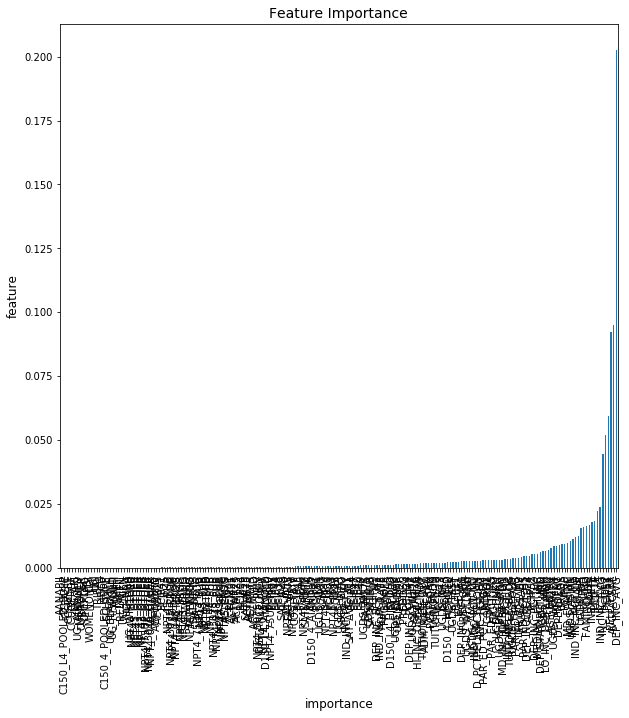

In [5]:
target = 'MD_EARN_WNE_P6'

train, test = model.sampling_data(merged_df)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)
est = 14
sel = 1
x_train = x_train.drop(['STABBR'], axis=1)
x_test = x_test.drop(['STABBR'], axis=1)
x_train = x_train.drop(['INSTNM'], axis=1)
x_test = x_test.drop(['INSTNM'], axis=1)
model.graph_feature_importance(x_train, y_train, x_test, est, model.RF)

In [74]:
rf_feature_importance = model.create_random_forest(x_train, y_train, x_test, est)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [9]:
len(train.columns)

208

In [10]:
preds = model.create_random_forest(x_train, y_train, x_test, est)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, preds)

ValueError: Found input variables with inconsistent numbers of samples: [4232, 205]

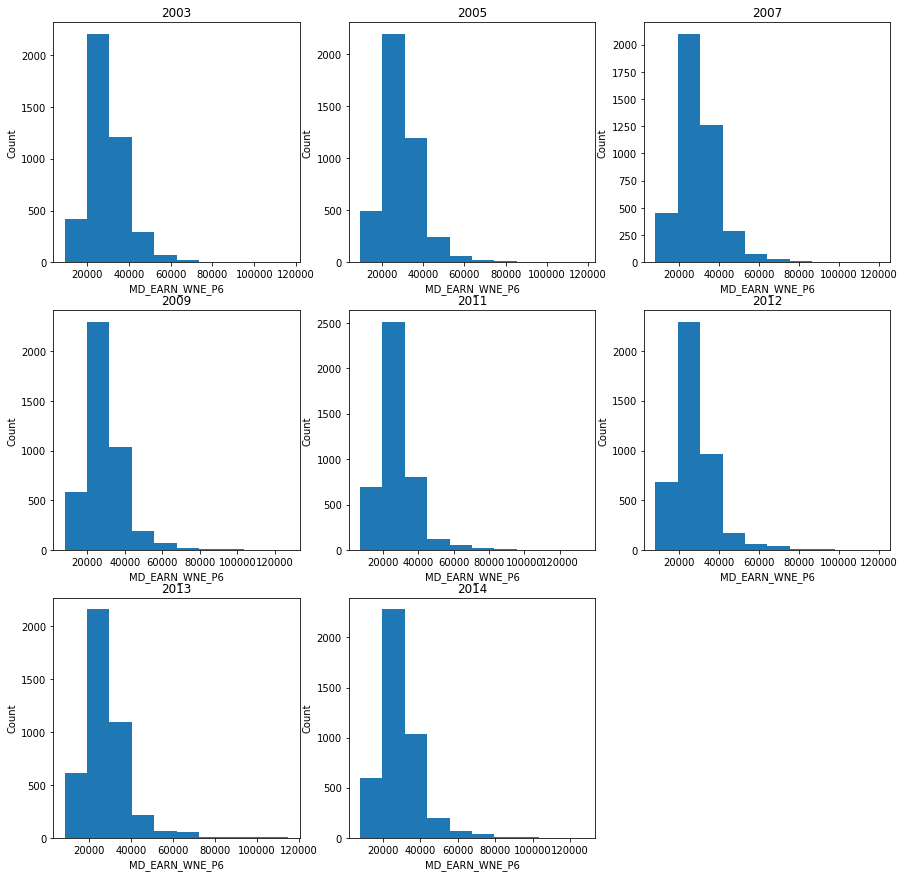

In [86]:
#Data Exploration
unique_years = set(merged_df['Year'])
unique_years.remove(1996)
unique_years.remove(1997)
unique_years.remove(1998)
unique_years.remove(1999)
unique_years.remove(2000)
unique_years.remove(2001)
unique_years.remove(2002)
unique_years.remove(2004)
unique_years.remove(2006)
unique_years.remove(2008)
unique_years.remove(2010)
unique_years.remove(2015)
unique_years.remove(2016)
unique_years.remove(2017)


index = 331
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for y in unique_years:
    plt.subplot(index)
    plt.title(y)
    plt.ylabel('Count')
    plt.xlabel(target)
    plt.hist(merged_df.loc[merged_df['Year'] == y][target])
    index += 1

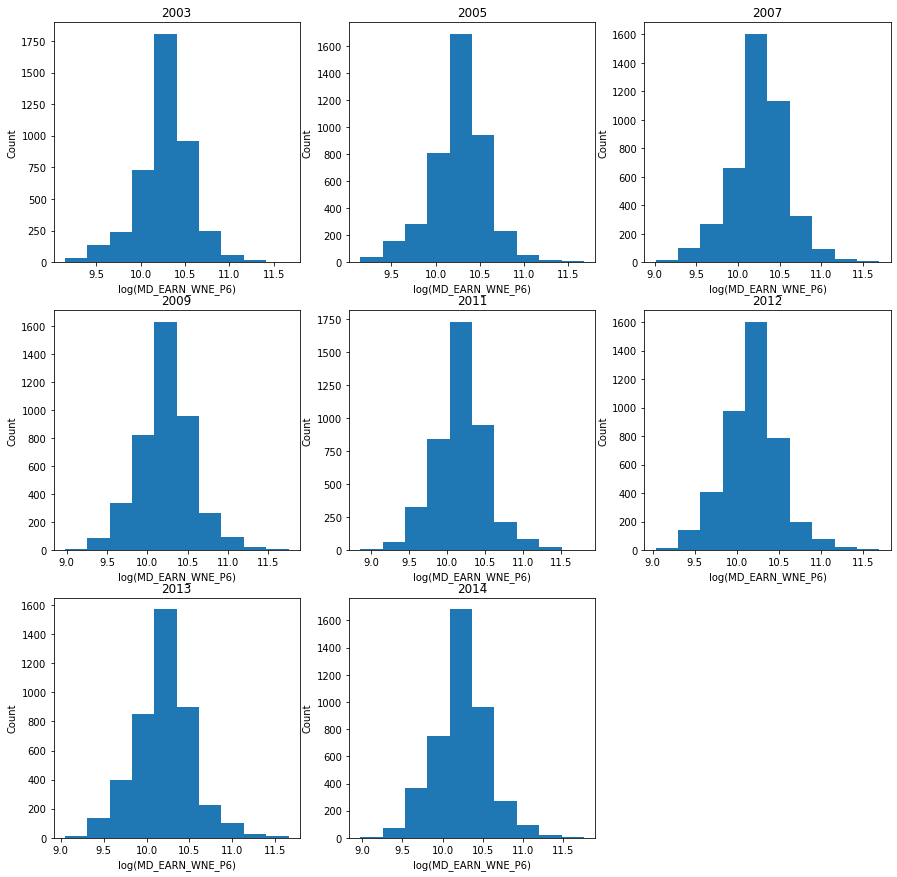

In [73]:
index = 331  
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for y in unique_years:
    plt.subplot(index)
    plt.title(y)
    plt.ylabel('Count')
    plt.xlabel('log(' + target + ')')
    plt.hist(np.log(merged_df.loc[merged_df['Year'] == y][target]))
    index += 1

Consider transforming the target variable and observe impact on mean absolute error or median abosolute error. This should help with linear models.
https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html
https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va


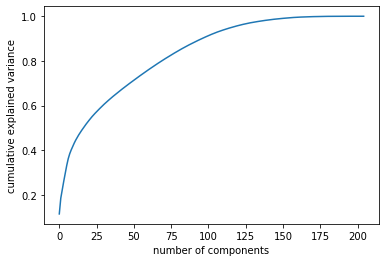

In [85]:
#PCA
from sklearn.preprocessing import StandardScaler

x = merged_df.drop(['Year'], axis=1)
x = x.drop(['STABBR'], axis=1)
x = x.drop(['INSTNM'], axis=1)
y = merged_df['Year']
x = StandardScaler().fit_transform(x)
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
merged_df.mean